In [1]:
# NLTK (Natural Language Toolkit) is a Python package that is used for Natural Language Processing (NLP)
#!pip install nltk
#Import NLTK library 
import nltk

In [2]:
#!pip install numpy pandas matplotlib seaborn scikit-learn spacy transformers datasets plotly tqdm sentencepiece

In [3]:
#Import Pandas
import pandas as pd

In [4]:
file_path = 'C:/Users/Charles/Documents/CFA L3/Python Data Science and AI/All files/UNIT 4/financial_news.csv'

In [5]:
# Pandas is used to read a csv file and store data in a DataFrame
df = pd.read_csv(file_path)
df

,Text,Label
0,Amazon to create 500 new jobs in Mississippi a...,positive
1,"GE's stock rises 1% premarket, set to trade ab...",positive
2,"CN Rail Strike Begins, Threatening Canada Oil,...",negative
3,"Hong Kong Airlines to cut 400 jobs, ask employ...",negative
4,3 Top-Performing Mutual Funds to Consider for ...,neutral
...,...,...
9544,Stock Market Update: Boeing turns positive,positive
9545,33 genius travel hacks to upgrade your holiday...,neutral
9546,Hong Kong stocks increased 4% as China relaxes...,positive
9547,Novo Nordisk stock increased by 2% in today's ...,positive


In [6]:
# Use the head method to display the first rows in the Pandas DataFrame df
df.head()

,Text,Label
0,Amazon to create 500 new jobs in Mississippi a...,positive
1,"GE's stock rises 1% premarket, set to trade ab...",positive
2,"CN Rail Strike Begins, Threatening Canada Oil,...",negative
3,"Hong Kong Airlines to cut 400 jobs, ask employ...",negative
4,3 Top-Performing Mutual Funds to Consider for ...,neutral


In [7]:
# Check the shape of the Pandas DataFrame 
df.shape

(9549, 2)

In [8]:
# Count the number of "neutral", "positive", and "negative" samples in the "Label" column
df['Label'].value_counts()

Label
neutral     6179
positive    1927
negative    1443
Name: count, dtype: int64

In [9]:
# iloc[] is used for integer-based Pandas DataFrame indexing
df.iloc[0]

Text     Amazon to create 500 new jobs in Mississippi a...
Label                                             positive
Name: 0, dtype: object

In [10]:
# Print 5 samples from the Pandas DataFrame "df" and Perform a sanity check
for i in range(5):
    print('Data: {}'.format(df.iloc[i]['Text']))
    print('Label: {}'.format(df.iloc[i]['Label']))     
    print('\n')

Data: Amazon to create 500 new jobs in Mississippi as it builds new fulfillment center
Label: positive


Data: GE's stock rises 1% premarket, set to trade above $13 for 1st time in regular-session hours since October 2018
Label: positive


Data: CN Rail Strike Begins, Threatening Canada Oil, Grain Shipments
Label: negative


Data: Hong Kong Airlines to cut 400 jobs, ask employees to take unpaid leave: SCMP
Label: negative


Data: 3 Top-Performing Mutual Funds to Consider for Your Retirement Portfolio- February 07, 2020
Label: neutral




In [11]:
# Obtain information about the Pandas DataFrame using the info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9549 non-null   object
 1   Label   9549 non-null   object
dtypes: object(2)
memory usage: 149.3+ KB


In [12]:
# get the length of te data frame
len(df)

9549

In [13]:
#get the last 10 rows of the df
for i in range(len(df)-10, len(df), 1):
    print('Data: {}'.format(df.iloc[i]['Text']))
    print('Label: {}'.format(df.iloc[i]['Label']))     
    print('\n')

Data: Japan Recession Risks Prompt Forecasts of 2020 Contraction
Label: negative


Data: Novo Nordisk beats analysts estimates in Q2 2022
Label: positive


Data: Apple's iPhone sales accounted for 47.3 % of the company's overall revenue in Q1 2022
Label: neutral


Data: Alibaba lays off nearly 10000 employees to cut expenses
Label: positive


Data: Here's what happened to the stock market on Tuesday
Label: neutral


Data: Stock Market Update: Boeing turns positive
Label: positive


Data: 33 genius travel hacks to upgrade your holiday trips https://t.co/ZVckjmpdVE
Label: neutral


Data: Hong Kong stocks increased 4% as China relaxes virus rules
Label: positive


Data: Novo Nordisk stock increased by 2% in today's trading session
Label: positive


Data: Amazon stock lost half its value this year as tech stocks got crushed and recession fears grew
Label: negative




In [14]:
# Let's import the regular expressions (re) module in Python 
# A regular expression is a sequence of characters that specifies a match pattern in text
# Regular expressions are commonly used for search operations on Strings
import re

In [15]:
# Let's download common stop words present in the English language from the nltk library
# Stop words are a set of commonly used words such as “is” and “and”
nltk.download('stopwords')
from nltk.corpus import stopwords
set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Charles\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [16]:
# Let's define a function that performs data cleaning by removing stop words and non-alphanumeric characters  
# Note that alphanumeric characters (letters and digits) in English includes letters from A to Z and Arabic numerals 0 to 9

# The function takes in a string of text, removes non-alphanumeric characters, converts text to lower case, 
# removes stop words and returns cleaned text in a String format

def clean_text(text):

    # Let's remove non-alphanumeric charachters 
    # The re.sub() returns a string where all matching occurrences of the given pattern are replaced by the provided string
    # This is a regular expression to remove any non-alphanumeric from a string variable called text
    # a-zA-Z0-9 means alphanumeric characters (letters and digits) 
    # a-z and A-Z specify all letters and 0-9 specifies all digits
    # ^ means negated character set
    # Note that "r" creates a raw string that do not process escape sequences (\n)

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Convert text to lower case
    text = text.lower()

    # Remove stop words 
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Join words back into a single string
    cleaned_text = ' '.join(words)

    return cleaned_text

In [17]:
# Let's test out the Python Function 
clean_text('WELCOME to this practical skills module!!')

'welcome practical skills module'

In [18]:
# Let's apply the Python Function to the entire Pandas DataFrame
df['Cleaned Text'] = df['Text'].apply(clean_text)
df

,Text,Label,Cleaned Text
0,Amazon to create 500 new jobs in Mississippi a...,positive,amazon create 500 new jobs mississippi builds ...
1,"GE's stock rises 1% premarket, set to trade ab...",positive,ges stock rises 1 premarket set trade 13 1st t...
2,"CN Rail Strike Begins, Threatening Canada Oil,...",negative,cn rail strike begins threatening canada oil g...
3,"Hong Kong Airlines to cut 400 jobs, ask employ...",negative,hong kong airlines cut 400 jobs ask employees ...
4,3 Top-Performing Mutual Funds to Consider for ...,neutral,3 topperforming mutual funds consider retireme...
...,...,...,...
9544,Stock Market Update: Boeing turns positive,positive,stock market update boeing turns positive
9545,33 genius travel hacks to upgrade your holiday...,neutral,33 genius travel hacks upgrade holiday trips h...
9546,Hong Kong stocks increased 4% as China relaxes...,positive,hong kong stocks increased 4 china relaxes vir...
9547,Novo Nordisk stock increased by 2% in today's ...,positive,novo nordisk stock increased 2 todays trading ...


In [19]:
# Let's define a function that receives a string of text and generates word cloud visualization 
# The Python Function also removes custom stop words such as politics-related words before generating the word cloud

# Let's install and import WordCloud library
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


def generate_word_cloud(text):
    
    # Add custom stop words
    custom_stopwords = {"http", "china", "us", "united states", "political", "politics","stock","stocks", "trump"}

    # Update the default stop words included in the WordCloud library with our custom stop words
    stopwords = set(STOPWORDS)
    stopwords.update(custom_stopwords)

    # Generate the WordCloud object
    wordcloud = WordCloud(width = 1600, height = 800, stopwords = stopwords, min_font_size = 10).generate(text)

    # Display the WordCloud 
    plt.figure(figsize = (12, 12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

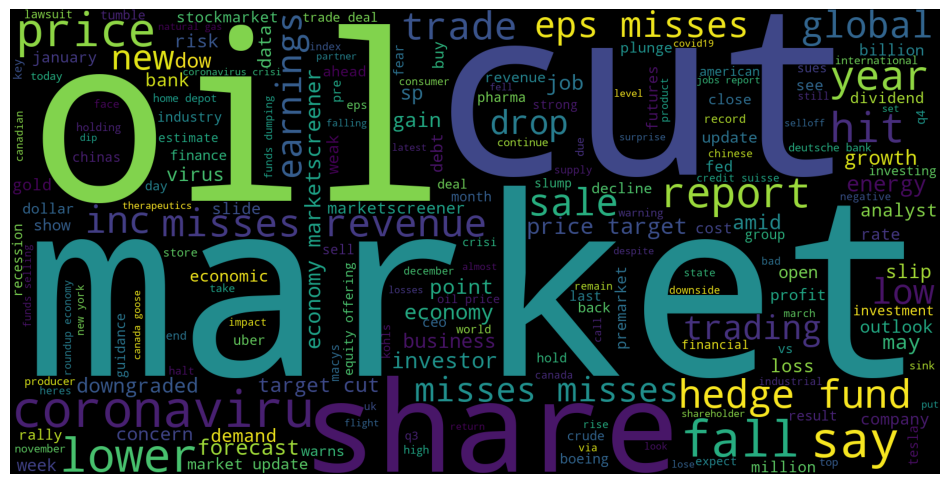

In [20]:
# Generate word cloud visualization for text with negative sentiment
generate_word_cloud(" ".join(df[df['Label'] == 'negative']['Cleaned Text']))

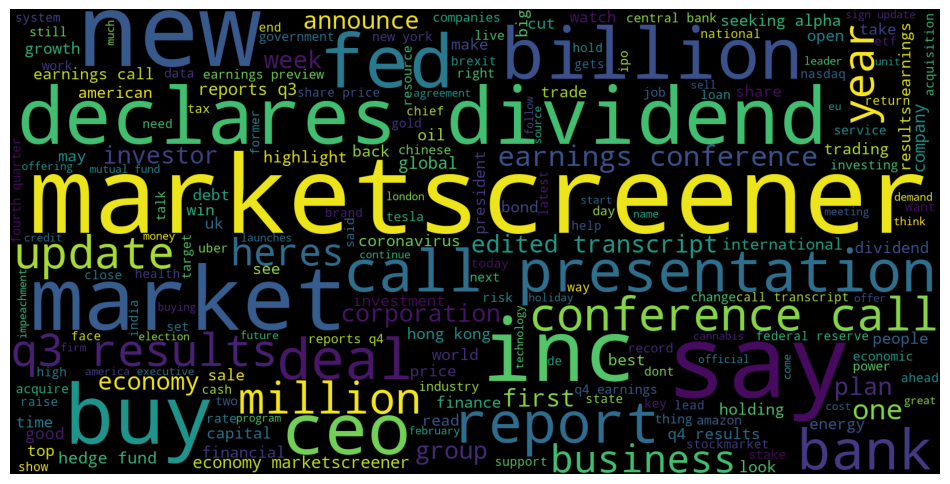

In [21]:
# Generate word cloud visualization for text with neutral sentiment
generate_word_cloud(" ".join(df[df['Label'] == 'neutral']['Cleaned Text']))

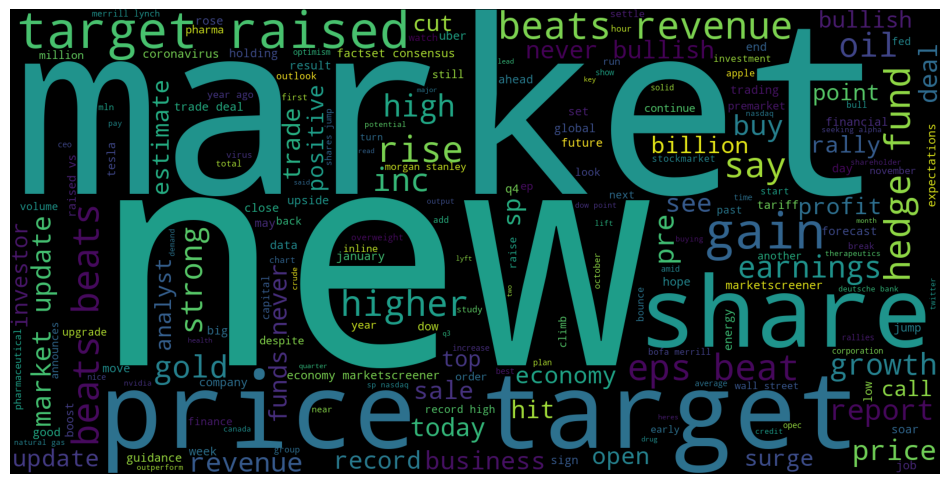

In [22]:
# Generate word cloud visualization for text with positive sentiment
generate_word_cloud(" ".join(df[df['Label'] == 'positive']['Cleaned Text']))

In [23]:
# Let's perform text data encoding by converting text into numbers to be used for model training
# FinBERT is a pre-trained NLP model to analyze sentiment of financial text
# Hugging Face is a popular community and data science platform that offers tools to build, train and deploy AI/ML models
# Prosus is a global consumer internet group and one of the largest technology investors in the world
# Source: https://huggingface.co/ProsusAI/finbert

#!pip install transformers

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

C:\Users\Charles\anaconda3\envs\torchenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
news_1 = "Hong Kong stocks increased 4% as China relaxes virus rules"
news_2 = "Novo Nordisk stock increased by 2% in today's trading session"
news_3 = "Amazon stock lost half its value this year as tech stocks got crushed and recession fears grew"

In [25]:
# View an encoded version of a sample dataset #1
encoded_news_1 = tokenizer.encode(news_1)
print(encoded_news_1)

[101, 4291, 4290, 15768, 3445, 1018, 1003, 2004, 2859, 9483, 2229, 7865, 3513, 102]


In [26]:
# View an encoded version of a sample dataset #2
encoded_news_2 = tokenizer.encode(news_2)
print(encoded_news_2)

[101, 24576, 13926, 20573, 4518, 3445, 2011, 1016, 1003, 1999, 2651, 1005, 1055, 6202, 5219, 102]


In [27]:
# View an encoded version of a sample dataset #3
encoded_news_3 = tokenizer.encode(news_3)
print(encoded_news_3)

[101, 9733, 4518, 2439, 2431, 2049, 3643, 2023, 2095, 2004, 6627, 15768, 2288, 10560, 1998, 19396, 10069, 3473, 102]


In [28]:
news_4 = "JP Morgan Sees 70% upside for these 2 autostocks in 2023"
news_5 = "JP Morgans, Goldman say stock recovery won't be easy in 2023"

In [29]:
# View an encoded version of a sample dataset #4 & 5
encoded_news_4 = tokenizer.encode(news_4)
print(encoded_news_4)
encoded_news_5 = tokenizer.encode(news_5)
print(encoded_news_5)

[101, 16545, 5253, 5927, 3963, 1003, 14961, 2005, 2122, 1016, 8285, 14758, 2015, 1999, 16798, 2509, 102]
[101, 16545, 5253, 2015, 1010, 17765, 2360, 4518, 7233, 2180, 1005, 1056, 2022, 3733, 1999, 16798, 2509, 102]


In [30]:
# View an encoded version of sample dataset #1 to 5 and obtain their length 
print(encoded_news_1)
len(encoded_news_1)

[101, 4291, 4290, 15768, 3445, 1018, 1003, 2004, 2859, 9483, 2229, 7865, 3513, 102]


14

In [31]:
print(encoded_news_2)
len(encoded_news_2)

[101, 24576, 13926, 20573, 4518, 3445, 2011, 1016, 1003, 1999, 2651, 1005, 1055, 6202, 5219, 102]


16

In [32]:
print(encoded_news_3)
len(encoded_news_3)

[101, 9733, 4518, 2439, 2431, 2049, 3643, 2023, 2095, 2004, 6627, 15768, 2288, 10560, 1998, 19396, 10069, 3473, 102]


19

In [33]:
print(encoded_news_4)
len(encoded_news_4)

[101, 16545, 5253, 5927, 3963, 1003, 14961, 2005, 2122, 1016, 8285, 14758, 2015, 1999, 16798, 2509, 102]


17

In [34]:
print(encoded_news_5)
len(encoded_news_5)

[101, 16545, 5253, 2015, 1010, 17765, 2360, 4518, 7233, 2180, 1005, 1056, 2022, 3733, 1999, 16798, 2509, 102]


18

In [35]:
# Data has to be converted to tensors so we can perform padding 
# PyTorch is a widely used framework developed by META that offers an easy-to-use interface for building, training and testing ANNs 
# Tensors are the main data structure used in PyTorch to represent multi-dimensional arrays, such as images, text, or audio 
# Tensors can be created from Numpy arrays or from Python Lists

# Let's install PyTorch
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

In [36]:
# Let's import torch and perform sequence padding
import torch
from torch.nn.utils.rnn import pad_sequence
padded_sequence = pad_sequence([torch.tensor(encoded_news_1), torch.tensor(encoded_news_2), torch.tensor(encoded_news_3)], batch_first = True, padding_value = 0).numpy()
padded_sequence

array([[  101,  4291,  4290, 15768,  3445,  1018,  1003,  2004,  2859,
         9483,  2229,  7865,  3513,   102,     0,     0,     0,     0,
            0],
       [  101, 24576, 13926, 20573,  4518,  3445,  2011,  1016,  1003,
         1999,  2651,  1005,  1055,  6202,  5219,   102,     0,     0,
            0],
       [  101,  9733,  4518,  2439,  2431,  2049,  3643,  2023,  2095,
         2004,  6627, 15768,  2288, 10560,  1998, 19396, 10069,  3473,
          102]])

In [37]:
# Let's define a Python Function that performs tokenization and padding to text data in DataFrames
def tokenization_padding(df):

    # Use Python List Comprehension to tokenize every row in the Pandas DataFrame "df" 
    df['Encoded Text'] = [tokenizer.encode(news) for news in df['Cleaned Text'].tolist()]

    # Convert data into tensors using List Comprehension and then perform Zero-Padding to ensure that data has the same length
    encoded_news_tensor = [torch.tensor(encoded_news) for encoded_news in df['Encoded Text'].tolist()]
    padded_sequence = pad_sequence(encoded_news_tensor, batch_first = True, padding_value = 0).numpy()

    return padded_sequence

In [38]:
# Call the function and send it the entire Pandas DataFrame "df"
# The function returns X which is going to be used as an input to the machine learning model
X = tokenization_padding(df)
X

array([[  101,  9733,  3443, ...,     0,     0,     0],
       [  101, 16216,  2015, ...,     0,     0,     0],
       [  101, 27166,  4334, ...,     0,     0,     0],
       ...,
       [  101,  4291,  4290, ...,     0,     0,     0],
       [  101, 24576, 13926, ...,     0,     0,     0],
       [  101,  9733,  4518, ...,     0,     0,     0]], shape=(9549, 61))

In [39]:
# Let's check out the shape of X
X.shape

(9549, 61)

In [40]:
# Let's view the Pandas DataFrame df
df

,Text,Label,Cleaned Text,Encoded Text
0,Amazon to create 500 new jobs in Mississippi a...,positive,amazon create 500 new jobs mississippi builds ...,"[101, 9733, 3443, 3156, 2047, 5841, 5900, 1647..."
1,"GE's stock rises 1% premarket, set to trade ab...",positive,ges stock rises 1 premarket set trade 13 1st t...,"[101, 16216, 2015, 4518, 9466, 1015, 26563, 17..."
2,"CN Rail Strike Begins, Threatening Canada Oil,...",negative,cn rail strike begins threatening canada oil g...,"[101, 27166, 4334, 4894, 4269, 8701, 2710, 351..."
3,"Hong Kong Airlines to cut 400 jobs, ask employ...",negative,hong kong airlines cut 400 jobs ask employees ...,"[101, 4291, 4290, 7608, 3013, 4278, 5841, 3198..."
4,3 Top-Performing Mutual Funds to Consider for ...,neutral,3 topperforming mutual funds consider retireme...,"[101, 1017, 2327, 4842, 14192, 2075, 8203, 502..."
...,...,...,...,...
9544,Stock Market Update: Boeing turns positive,positive,stock market update boeing turns positive,"[101, 4518, 3006, 10651, 10321, 4332, 3893, 102]"
9545,33 genius travel hacks to upgrade your holiday...,neutral,33 genius travel hacks upgrade holiday trips h...,"[101, 3943, 11067, 3604, 20578, 2015, 12200, 6..."
9546,Hong Kong stocks increased 4% as China relaxes...,positive,hong kong stocks increased 4 china relaxes vir...,"[101, 4291, 4290, 15768, 3445, 1018, 2859, 948..."
9547,Novo Nordisk stock increased by 2% in today's ...,positive,novo nordisk stock increased 2 todays trading ...,"[101, 24576, 13926, 20573, 4518, 3445, 1016, 2..."


In [41]:
# Let's encode the label (target) column as follows:  
    # positive = 0
    # negative = 1
    # neutral  = 2
df['Encoded Label'] = df['Label'].replace('positive', 0).replace('negative', 1).replace('neutral', 2)

C:\Users\Charles\AppData\Local\Temp\ipykernel_10168\1560826416.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Encoded Label'] = df['Label'].replace('positive', 0).replace('negative', 1).replace('neutral', 2)


In [42]:
# Let's view the new Pandas DataFrame
df

,Text,Label,Cleaned Text,Encoded Text,Encoded Label
0,Amazon to create 500 new jobs in Mississippi a...,positive,amazon create 500 new jobs mississippi builds ...,"[101, 9733, 3443, 3156, 2047, 5841, 5900, 1647...",0
1,"GE's stock rises 1% premarket, set to trade ab...",positive,ges stock rises 1 premarket set trade 13 1st t...,"[101, 16216, 2015, 4518, 9466, 1015, 26563, 17...",0
2,"CN Rail Strike Begins, Threatening Canada Oil,...",negative,cn rail strike begins threatening canada oil g...,"[101, 27166, 4334, 4894, 4269, 8701, 2710, 351...",1
3,"Hong Kong Airlines to cut 400 jobs, ask employ...",negative,hong kong airlines cut 400 jobs ask employees ...,"[101, 4291, 4290, 7608, 3013, 4278, 5841, 3198...",1
4,3 Top-Performing Mutual Funds to Consider for ...,neutral,3 topperforming mutual funds consider retireme...,"[101, 1017, 2327, 4842, 14192, 2075, 8203, 502...",2
...,...,...,...,...,...
9544,Stock Market Update: Boeing turns positive,positive,stock market update boeing turns positive,"[101, 4518, 3006, 10651, 10321, 4332, 3893, 102]",0
9545,33 genius travel hacks to upgrade your holiday...,neutral,33 genius travel hacks upgrade holiday trips h...,"[101, 3943, 11067, 3604, 20578, 2015, 12200, 6...",2
9546,Hong Kong stocks increased 4% as China relaxes...,positive,hong kong stocks increased 4 china relaxes vir...,"[101, 4291, 4290, 15768, 3445, 1018, 2859, 948...",0
9547,Novo Nordisk stock increased by 2% in today's ...,positive,novo nordisk stock increased 2 todays trading ...,"[101, 24576, 13926, 20573, 4518, 3445, 1016, 2...",0


In [43]:
# The encoded label will be the output from the model "y"
y = df['Encoded Label'] 
y

0       0
1       0
2       1
3       1
4       2
       ..
9544    0
9545    2
9546    0
9547    0
9548    1
Name: Encoded Label, Length: 9549, dtype: int64

In [44]:
import sys
print(sys.executable)

C:\Users\Charles\anaconda3\envs\torchenv\python.exe


In [45]:
#!{sys.executable} -m pip install scikit-learn

In [46]:
# Let's use Scikit-Learn to split the data into training, validation and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, shuffle = False)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, shuffle = False)

In [47]:
# Let's check out the shape of the training, validation and testing subsets 
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(5729, 61)
(1910, 61)
(1910, 61)
(5729,)
(1910,)
(1910,)


In [48]:
# Let's train an Artificial Neural Network to solve regression type problems using Tensorflow and Keras
#!{sys.executable} -m pip install tensorflow-cpu
import tensorflow as tf
from tensorflow import keras

In [49]:
# The FinBERT tokenizer is used to pre-process text data before it is fed into the ANN model
# The tokenizer maps each word or subword in the input text to a unique integer ID from the vocabulary
# The input dimension of the ANN is determined by the length of the maximum sequence of words in the input data 
# The output dimension is 768 because the pre-trained FinBERT model used in this project has 768 hidden units in its last layer 
    
inputs = tf.keras.Input(shape = (X_train.shape[1],))


x = tf.keras.layers.Embedding(input_dim = tokenizer.vocab_size,
                              output_dim = 768,
                              input_length = X_train.shape[1])(inputs)

x = tf.keras.layers.LSTM(64, return_sequences = True, activation = 'tanh')(x)
x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)

C:\Users\Charles\anaconda3\envs\torchenv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [50]:
# Compile the model and choose the optimizer
# Adam optimizer works well in several deep learning applications such as computer vision and natural language processing 

# Cross entropy loss is a commonly used loss function in classification problems
# The goal is to predict a probability distribution over a set of classes
# Cross entropy loss measures the difference between predicted probability distribution and true distribution of the labels 
# "sparse_categorical_crossentropy" loss is used to measure the difference between the predicted sentiment class 
# and the true (ground truth) setiment label class
# The objective is to minimize this loss during training in order to improve the accuracy of model predictions

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [51]:
# Display a summary of the LSTM model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 61)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 61, 768)        │    23,440,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 61, 64)         │       213,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3904)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        11,715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,665,859 (90.28 MB)

 Trainable params: 23,665,859 (90.28 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Train the model
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    batch_size = 32,
                    epochs = 3)

Epoch 1/3
180/180 ━━━━━━━━━━━━━━━━━━━━ 74s 398ms/step - accuracy: 0.7059 - loss: 0.7403 - val_accuracy: 0.7670 - val_loss: 0.6003
Epoch 2/3
180/180 ━━━━━━━━━━━━━━━━━━━━ 70s 387ms/step - accuracy: 0.8897 - loss: 0.3069 - val_accuracy: 0.7654 - val_loss: 0.6340
Epoch 3/3
180/180 ━━━━━━━━━━━━━━━━━━━━ 71s 394ms/step - accuracy: 0.9705 - loss: 0.0865 - val_accuracy: 0.7707 - val_loss: 0.9414


In [53]:
# Evaluate trained model performance using the test subset
results = model.evaluate(X_test, y_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7518 - loss: 0.9877


In [54]:
# Let's print the model accuracy 
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 75.18%


In [55]:
# Generate predictions using the trained LSTM model
predictions = model.predict(X_test)
predictions

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


array([[3.2192758e-01, 4.7988069e-01, 1.9819173e-01],
       [2.6713416e-04, 1.0701480e-03, 9.9866271e-01],
       [1.4086789e-03, 9.6640020e-04, 9.9762493e-01],
       ...,
       [8.5369158e-01, 1.3210990e-01, 1.4198541e-02],
       [1.6079666e-04, 1.2292562e-05, 9.9982697e-01],
       [1.0974148e-02, 1.4401677e-04, 9.8888177e-01]],
      shape=(1910, 3), dtype=float32)

In [56]:
# Let's convert probabilities into labels 0, 1, and 2 so we can compare them to the ground truth labels
# Argmax is used to obtain an array of indices of max values of a given array 
import numpy as np

y_predict = []

for i in predictions:
  y_predict.append(np.argmax(i))

y_predict

[np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.in

In [57]:
# Let's display the ground truth data
y_test

5729    2
5730    2
5731    2
5732    2
5733    0
       ..
7634    0
7635    0
7636    0
7637    2
7638    1
Name: Encoded Label, Length: 1910, dtype: int64

In [58]:
# Let's install Seaborn library which offers enhanced features compared to Matplotlib 
# Link: https://seaborn.pydata.org/
#!{sys.executable} -m pip install seaborn
import seaborn as sns

<Axes: >

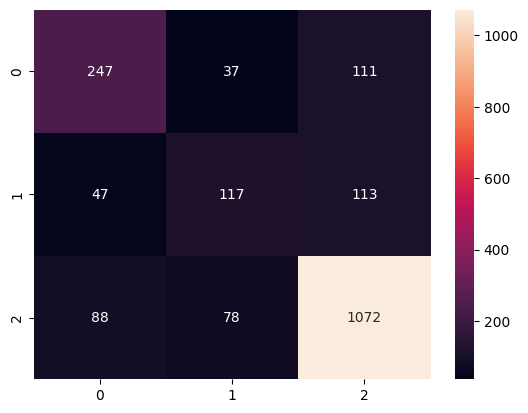

In [59]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt = 'd', annot = True)

In [60]:
# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       395
           1       0.50      0.42      0.46       277
           2       0.83      0.87      0.85      1238

    accuracy                           0.75      1910
   macro avg       0.66      0.64      0.65      1910
weighted avg       0.74      0.75      0.75      1910



In [67]:
!pip install tf-keras

  Obtaining dependency information for tf-keras from https://files.pythonhosted.org/packages/85/6b/d9a8202bfe5c9e3b078cf550bafab962aa9d6b1a1f1180f0065399d4c9b2/tf_keras-2.20.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 217.9 kB/s eta 0:00:08
   - -------------------------------------- 0.1/1.7 MB 363.1 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.7 MB 490.2 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.7 MB 697.2 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.7 MB 911.0 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.7 MB 1.0 MB/s eta 0:00:02
   ------------- -------------------------- 0.6/1.7 MB 1.5 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1

In [64]:
#!{sys.executable} -m pip uninstall tf keras

In [69]:
!{sys.executable} -m pip install tf-keras

  Using cached tf_keras-2.20.1-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow-2.20.0-cp311-cp311-win_amd64.whl.metadata (4.6 kB)
Using cached tf_keras-2.20.1-py3-none-any.whl (1.7 MB)
Using cached tensorflow-2.20.0-cp311-cp311-win_amd64.whl (331.8 MB)

   ---------------------------------------- 0/2 [tensorflow]
   ---------------------------------------- 0/2 [tensorflow]
   ---------------------------------------- 0/2 [tensorflow]
   ---------------------------------------- 0/2 [tensorflow]



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Charles\\anaconda3\\envs\\torchenv\\Lib\\site-packages\\tensorflow\\compiler\\mlir\\lite\\python\\_pywrap_converter_api.pyd'
Consider using the `--user` option or check the permissions.



In [68]:
# Let's use pre-trained language models 
# from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from transformers import AutoTokenizer, pipeline
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
sentiment_pipeline = pipeline("sentiment-analysis", model = "ProsusAI/finbert", tokenizer = tokenizer)

ValueError: Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.